# Lineare Regression

In diesem Notebook werden mittels linearer Regression Vorhersagen auf dem "Advertising"-Datensatz machen. Ziel ist es auf Basis von Werbeausgaben (im Bereich "TV", "Radio" und "Newspaper") Vorhersagen über Verkaufserlöse ("Sales") zu machen.

### Laden des Advertising-Datensatzes

Zuerst laden wird die Daten aus der csv-Datei `advertising.csv` in einen Pandas-DataFrame und schauen uns die Daten kurz an.

In [23]:
import pandas as pd
data_raw = pd.read_csv("data/advertising.csv")
data_raw.head()

,index,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Die `head`-Funktion zeigt nur die ersten 5 Datenpunkte im DataFrame an. Um zu wissen wie viele Datenpunkte sich im DataFrame befinden, schauen wir auf das `shape`-Attribut.

In [24]:
rows, cols = data_raw.shape
print("Anzahl Zeilen:", rows)
print("Anzahl Spalten:", cols)

Anzahl Zeilen: 200
Anzahl Spalten: 5


Die erste Spalte enthält lediglich einen fortlaufenden Index und wird für die Vorhersage nicht benötigt, daher wird sie entfernt.

In [25]:
data = data_raw.drop(columns=['index'])
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Als nächstes visualieren wir die Datenpunkte mit Hilfe der `matplotlib`-Library.
Dazu erstellten wir einen Plot, welcher auf der x-Achse die `TV`-Daten und auf der y-Achse die `sales`-Daten darstellt.

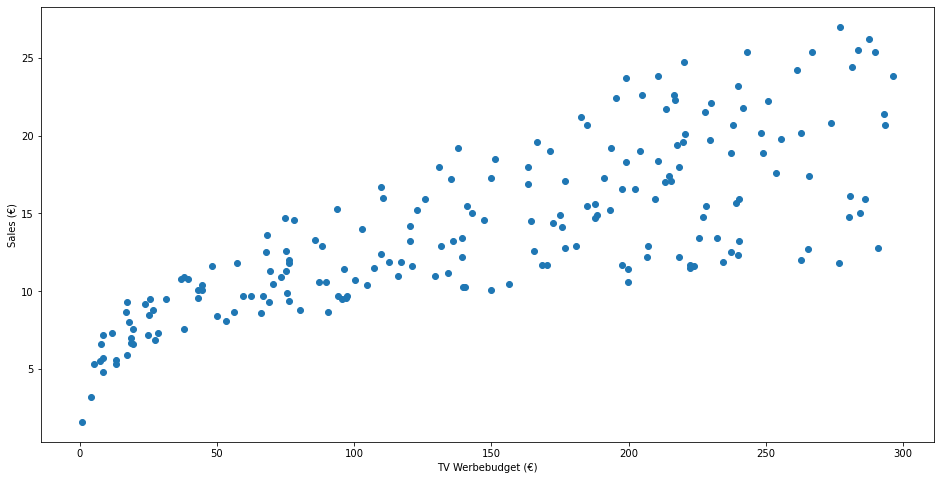

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.scatter(data['TV'], data['sales'])
plt.xlabel("TV Werbebudget (€)")
plt.ylabel("Sales (€)")
plt.show()

### Training der linearen Regression

Als erstes Modell trainieren wir eine lineare Regression mit nur einem Feature. Als Feature wählen wir die Spalte `TV`.

Bevor wir mit dem Training beginnen, unterteilten wir die verfügbaren Daten in Trainings- und Testdaten, wobei die Trainingsdaten 80% der ursprünglichen Daten beinhalten sollen und die Testdaten 20%.

In [27]:
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index) # Daten welche nicht in train_data sind

print('Shape der Trainingsdaten:', train_data.shape)
print('Shape der Testdaten:', test_data.shape)

Shape der Trainingsdaten: (160, 4)
Shape der Testdaten: (40, 4)


Anschließend trainieren wir auf den Trainingsdaten eine lineare Regression mit dem Feature `TV` und dem Label `sales`.
Dafür erstellen wir:
1. Einen DataFrame mit dem Feature `TV`. Diesen nennen wir `X_train`
2. Eine Series mit dem Label. Diese nennen wir `y_train`

Um `X_train` als DataFrame und nicht als Series zu erhalten, müssen wir `TV` als Teil einer Liste übergeben. Der folgende Code zeigt den Unterschied:

In [28]:
X_series = train_data['TV'] # nur TV selektiert
print("Datentyp von X_series:", type(X_series))
X_df = train_data[['TV']] # Liste mit TV als einzigem Element
print("Datentyp von X_df:", type(X_df))

X_train = X_df # Die Features müssen als DataFrame vorliegen und nicht als Series
y_train = train_data['sales']
print("Datentyp von y_train:", type(y_train))

Datentyp von X_series: <class 'pandas.core.series.Series'>
Datentyp von X_df: <class 'pandas.core.frame.DataFrame'>
Datentyp von y_train: <class 'pandas.core.series.Series'>


Jetzt folgt das eigentliche Training des Modells:

In [29]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Die lineare Regression ist nun trainiert und die Modellgewichte in the `reg`-Variable verfügbar. Wir können uns nun die Regressionsgerade ausgeben lassen.

In [30]:
print(f"Regressionsgerade: y = {reg.intercept_} + {reg.coef_[0]}*TV")

Regressionsgerade: y = 6.745792674540394 + 0.04950397743349263*TV


Mit dem trainierten Modell können wir nun Vorhersagen auf einzelnen Datenpunkten machen.

In [31]:
dataPoint = X_train.iloc[0] # erster Datenpunkt aus den Trainingsdaten
prediction = reg.predict([dataPoint]) # predict-Methode erwartet Liste von Datenpunkten 
print(f"Bei einem TV-Werbebudget von {dataPoint[0]}€, werden {prediction[0]}€ Umsatz erzielt.")

Bei einem TV-Werbebudget von 69.2€, werden 10.171467912938084€ Umsatz erzielt.


Um zu Visualisieren wie die trainierte Regressionsgerade aussieht, machen wir mit dem Modell Vorhersagen auf den Trainingsdatenpunkten.

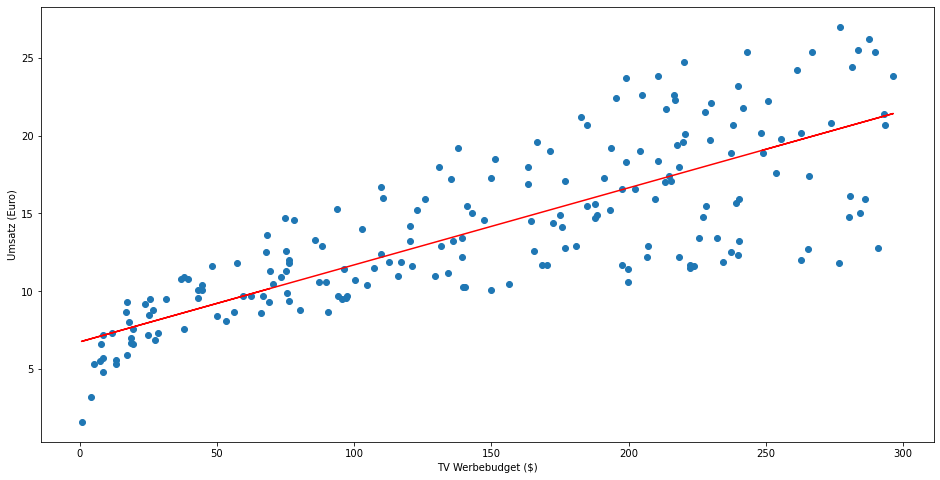

In [32]:
prediction_train = reg.predict(X_train) # Vorhersage auf allen Trainingsdaten gleichzeitig

plt.figure(figsize=(16, 8))
plt.scatter(data['TV'], data['sales']) # Trainingsdatenpunkte
plt.plot(X_train, prediction_train, 'r') # Regressionsgerade
plt.xlabel("TV Werbebudget ($)")
plt.ylabel("Umsatz (Euro)")
plt.show()

### Testen des Regressionsmodells

Um die Qualität des trainierte Regressionsmodells zu überprüfen, machen wir damit Vorhersagen auf den Testdaten und bestimmen den MSE.

In [33]:
from sklearn.metrics import mean_squared_error
X_test = test_data[['TV']]     # X_test muss ein DateFrame sein
y_test = test_data['sales']    # y_test muss eine Series sein
prediction_test = reg.predict(X_test)
mse_test =  mean_squared_error(y_test, prediction_test)
print("Mean squared error (MSE) auf Testdaten:", mse_test)

Mean squared error (MSE) auf Testdaten: 14.41037265386388


### Multidimensionale lineare Regression

Wir erweitern nun die lineare Regression indem wir die beiden Features `radio` und `newspaper` zusätzlich benutzen.

In [34]:
X_train = train_data[["TV", "radio", "newspaper"]]
y_train = train_data['sales']
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
print(f"Regression: Y = {reg_all.intercept_} + {reg_all.coef_[0]}*TV + {reg_all.coef_[1]}*radio + {reg_all.coef_[2]}*newspaper")

Regression: Y = 2.9008471054251608 + 0.04699763711005833*TV + 0.1822877768933094*radio + -0.0012975074726833402*newspaper


Abschließend nutzen wir das neuen Modell um wiederum Vorhersagen auf den Testdaten zu machen.

In [35]:
X_test = test_data[["TV", "radio", "newspaper"]]
y_test = test_data['sales']
predictions = reg_all.predict(X_test)
mse =  mean_squared_error(y_test, predictions)
print("Mean squared error (MSE) auf Testdaten: %.2f" % mse)

Mean squared error (MSE) auf Testdaten: 3.16


Wie wir sehen können ist die Vorhersage für das multidimensionale Modell besser als die normale lineare Regression (der MSE ist wesentlich kleiner). Das Hinzufügen der neuen Features verbessert also die Vorhersagekraft des Modells. 

### Aufgabe

Bestimmen Sie welches der drei Features „TV“, „radio“ und „newspaper“ die stärkste Vorhersagekraft auf das Label „sales“ hat. Trainieren Sie dazu drei Modelle mit jeweils einem dieser Features und vergleichen Sie den MSE auf den Testdaten.